In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(cv2.__version__)

4.4.0


(480, 640, 3)


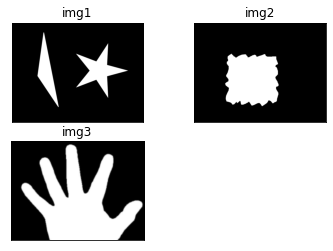

In [3]:
path1 = './img/contour1.png'
path2 = './img/contour2.png'
path3 = './img/contour3.png'

img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
img3 = cv2.imread(path3)

img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img3_gray = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)


print(img1.shape)

imgs = {'img1':img1_gray, 'img2':img2_gray, 'img3':img3_gray}
for i, (key,value) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(key)
    plt.imshow(value,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## 영역 크기

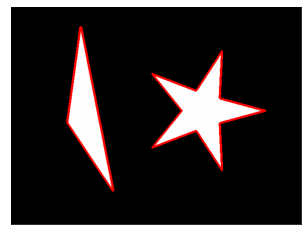

18772.0
13426.0


In [4]:
_,img1_th = cv2.threshold(img1_gray,127,255,0)
contous1, hierarchy1 = cv2.findContours(img1_th,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for cnt1 in contous1:
    cv2.drawContours(img1,[cnt1],0,(255,0,0),3)

plt.imshow(img1)
plt.xticks([])
plt.yticks([])
    
plt.show()

for cnt1 in contous1:
    area = cv2.contourArea(cnt1)
    print(area)

## 무게중심

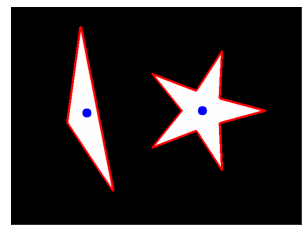

In [10]:
for cnt1 in contous1:
    M = cv2.moments(cnt1)
    
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    cv2.circle(img1, (cx, cy), 10, (0, 0, 255), -1)
    
plt.imshow(img1)
plt.xticks([])
plt.yticks([])
    
plt.show()

## 경계 사각형 (Bounding Rectangle)

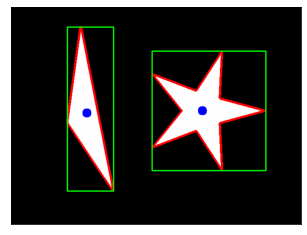

In [11]:
for cnt1 in contous1:
    x, y, w, h = cv2.boundingRect(cnt1)
    cv2.rectangle(img1, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
plt.imshow(img1)
plt.xticks([])
plt.yticks([])
    
plt.show()

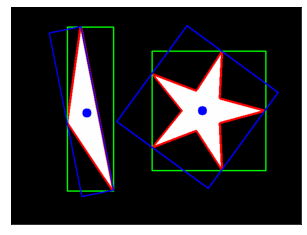

In [14]:
for cnt1 in contous1:
    rect = cv2.minAreaRect(cnt1)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img1, [box], 0,(0,0,255),2)
    
plt.imshow(img1)
plt.xticks([])
plt.yticks([])
    
plt.show()

## 근사화

4


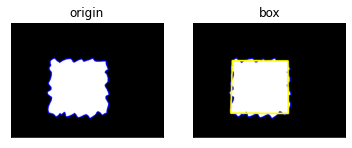

In [5]:
_,img2_th = cv2.threshold(img2_gray,127,255,0)
contous2, hierarchy2 = cv2.findContours(img2_th,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for cnt2 in contous2:
    cv2.drawContours(img2,[cnt2],0,(0,0,255),3)

img2_c = img2.copy()

for cnt2 in contous2:
    epsilon = 0.02 * cv2.arcLength(cnt2, True)
    approx = cv2.approxPolyDP(cnt2, epsilon, True)
    print(len(approx))
    cv2.drawContours(img2_c,[approx],0,(255,255,0),5)
    
imgs = {'origin':img2, 'box':img2_c}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1,2,i+1)
    plt.title(key)
    plt.imshow(value)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Convexity Defects

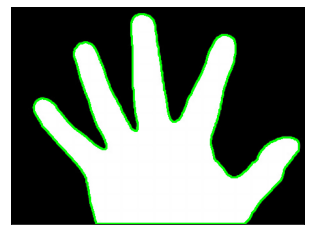

In [17]:
_,img3_th = cv2.threshold(img3_gray,127,255,0)
contous3, hierarchy3 = cv2.findContours(img3_th,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for cnt3 in contous3:
    cv2.drawContours(img3, [cnt3], 0, (0,255,0),2)
    
plt.imshow(img3)
plt.xticks([])
plt.yticks([])
    
plt.show()

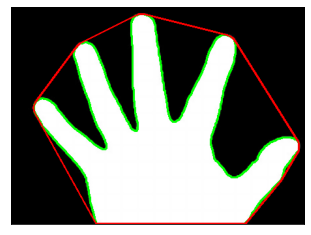

In [23]:
for cnt3 in contous3:
    hull = cv2.convexHull(cnt3)
    cv2.drawContours(img3, [hull], 0, (255,0,0),2)
    
plt.imshow(img3)
plt.xticks([])
plt.yticks([])
    
plt.show()

0 4 3 190


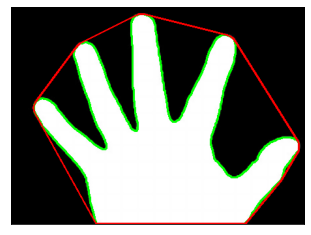

4 144 41 40643


TypeError: tuple indices must be integers or slices, not tuple

In [34]:
for cnt3 in contous3:
    hull = cv2.convexHull(cnt3, returnPoints = False)
    defects = cv2.convexityDefects(cnt3, hull)

    for i in range(defects.shape[0]):
        s,e,f,d = defects[i,0]
        start = tuple(cnt3[s][0])
        end = tuple(cnt3[e][0])
        far = tuple(cnt3[f][0])
        
        print(s,e,f,d)
        
        if d > 500:
            cv2.line(img3, start, end [0,0,255],5)
            cv2.circle(img3, far, 5, [255,0,0],-1)

        plt.imshow(img3)
        plt.xticks([])
        plt.yticks([])

        plt.show() 